In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import matplotlib.pyplot as plt

### Check that the donor details is in alignment with the files we got

In [3]:
import pandas as pd
from os import listdir
from os.path import join, exists

In [4]:
import scanpy as sc

In [5]:
# # this input contains the raw counts for all cells, and needs to be updated in the raw sesion of the object.
# input_path = '/lustre/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_oct_2022/input/input_all_cells_Chen+Hackney+Roska.h5ad'
# ad = sc.read_h5ad(input_path)
# print('done...')
# ad.obs['scpred_prediction'].value_counts()
# ad.obs['filename'].value_counts()

In [6]:
# filename_by_donor = df.set_index('donor')['file'].to_dict()

In [7]:
# # missing files are containing less than 50 cells per cell type. This was an arbitrary definition to consider these.
# for f in (set(df['file']) - set('./' + ad_raw.obs['dataset'].astype(str) + '/' + ad_raw.obs['filename'].astype(str) + '.h5ad')):
#     print(f)
#     ad2 = sc.read_h5ad(join('/storage/groups/ml01/datasets/projects/20210318_retinal_data_integration_ignacio.ibarra_malte.luecken', f))
#     print(ad2.obs['scpred_prediction'].value_counts())

In [8]:
# Fix export PDF as text issue
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fpath = "arial.ttf"
from matplotlib import font_manager as fm, rcParams
prop = fm.FontProperties(fname=fpath)
rcParams["font.family"] = "arial"

import os
import scanpy as sc
from os.path import join, exists
from os import listdir
import anndata
import scipy
import numpy as np
import sys


import seaborn as sns
sns.set()
from matplotlib import rcParams
import matplotlib.pyplot as plt

from utils import *

# convert counts into float32
# Convenience method for computing the size of objects
def print_size_in_MB(x):
    return '{:.3} MB'.format(x.__sizeof__()/1e6)

def print_size_in_MB_sparse_matrix(a):
    # a = scipy.sparse.csr_matrix(np.random.randint(10, size=(40, 3)))
    # x = a.data.nbytes + a.indptr.nbytes + a.indices.nbytes
    size = a.data.size/(1024**2)
    return '{:.3} MB'.format(size)

import warnings
warnings.filterwarnings("ignore")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

In [14]:
ad_by_k = {}
d = '../../data/integration_oct_2022/input/bydataset_500'
for f in listdir(d):
    print(f)
    p = os.path.join(d, f)
    print(p)
    ad = sc.read_h5ad(p)
    ad_by_k[f.replace('.h5ad', '')] = ad
    # if len(ad_by_k) == 3:
    #     break
print('done...')

Hafler_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Hafler_500.h5ad
Chen_c_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Chen_c_500.h5ad
Sanes_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Sanes_500.h5ad
Chen_a_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Chen_a_500.h5ad
Chen_b_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Chen_b_500.h5ad
Chang_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Chang_500.h5ad
Scheetz_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Scheetz_500.h5ad
Roska_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Roska_500.h5ad
Hackney_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Hackney_500.h5ad
Chen_rgc_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Chen_rgc_500.h5ad
Wong_500.h5ad
../../data/integration_oct_2022/input/bydataset_500/Wong_500.h5ad
done...


## Means PCA, to quickly visualize the separation between datasets

### Calculate means of all features, in a way to PCA-compare the expression values across all the samples.

In [15]:
common = None
for k in ad_by_k:
    ad = ad_by_k[k]
    var_names = ad.var_names
    common = set(var_names) if common is None else common.intersection(set(var_names))
    print(k, len(var_names), var_names[:5])
len(common)
order = pd.Series(list(common)).values


Hafler_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Chen_c_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Sanes_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Chen_a_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Chen_b_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Chang_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Scheetz_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Roska_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Hackney_500 56356 Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1'], dtype='object')
Chen_rgc_500 36601 Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL6273

In [16]:
print('here...')

here...


In [17]:

means = []
for k in ad_by_k:
    ad = ad_by_k[k]
    # ad_sel = ad[:,order]
    # assert sum(ad_sel.var_names.values == order) == len(order)
    next_means = ad.X.mean(axis=0)
    next_means = pd.DataFrame(next_means, columns=ad.var_names)
    means.append(next_means)
    print(next_means.shape)


(1, 36601)
(1, 36601)
(1, 36601)
(1, 36601)
(1, 36601)
(1, 36601)
(1, 36601)
(1, 36601)
(1, 56356)
(1, 36601)
(1, 36601)


In [18]:
len(means)

11

In [19]:
m = pd.concat(means)
m = m.dropna(axis=1, how='any')

In [20]:
for k in ad_by_k:
    print(k, ad_by_k[k].shape[0])

Hafler_500 3000
Chen_c_500 10000
Sanes_500 9129
Chen_a_500 20000
Chen_b_500 7500
Chang_500 4000
Scheetz_500 2947
Roska_500 7500
Hackney_500 5500
Chen_rgc_500 3500
Wong_500 2500


In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale, normalize

X = m
X -= np.mean(X, axis = 0) 
X = normalize(X, axis=1)

y = np.arange(X.shape[0])
target_names = list(ad_by_k.keys())[:len(y)]



In [22]:
tech = np.where(pd.Series(target_names).str.split('_').str[0].isin({'Chen', 'Chang', 'Hackney'}), 'snRNA-seq', 'scRNA-seq')
tech


array(['scRNA-seq', 'snRNA-seq', 'scRNA-seq', 'snRNA-seq', 'snRNA-seq',
       'snRNA-seq', 'scRNA-seq', 'scRNA-seq', 'snRNA-seq', 'snRNA-seq',
       'scRNA-seq'], dtype='<U9')

explained variance ratio (first two components): [0.5423936  0.18221767]


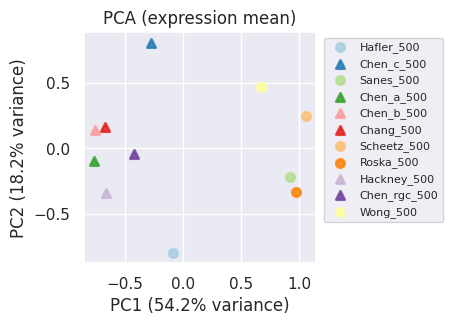

-0.081569165 -0.79883814
-0.27454174 0.809479
0.9259033 -0.21500987
-0.76307034 -0.09439331
-0.75925195 0.13775975
-0.6709148 0.16068521
1.0559549 0.2469989
0.97566146 -0.33522844
-0.65841126 -0.34256464
-0.4247003 -0.04206099
0.67493993 0.47317243


Text(0, 0.5, 'PC2 (18.2% variance)')

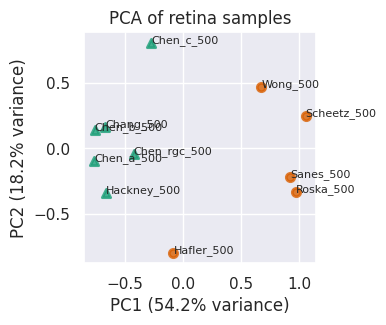

In [23]:

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

rcParams['figure.figsize'] = 3, 3

plt.figure()
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']
lw = 2
for color, i, target_name, tech_i in zip(colors, y, target_names, tech):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1],
        marker='^' if tech_i == 'snRNA-seq' else 'o',
        color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1, bbox_to_anchor=(1.01, 1), fontsize=8)
plt.xlabel('PC1 (%.1f%s variance)' % (pca.explained_variance_ratio_[0] * 100, '%'))
plt.ylabel('PC2 (%.1f%s variance)' % (pca.explained_variance_ratio_[1] * 100, '%'))
plt.title("PCA (expression mean)")
plt.show()

lw = 2


ax = plt.subplot()
for color, i, target_name, tech_i in zip(colors, y, target_names, tech):
    ax.scatter(
        X_r[y == i, 0], X_r[y == i, 1], marker='^' if tech_i == 'snRNA-seq' else 'o',
        color='#1b9e77' if tech_i == 'snRNA-seq' else '#d95f02', alpha=0.8, lw=lw, label=target_name
    )
    for xi, yi in X_r[y == i,:]:
        print(xi, yi)
        ax.annotate(target_name, (xi, yi), fontsize=8)
# plt.legend(loc="best", shadow=False, scatterpoints=1, bbox_to_anchor=(1.01, 1), fontsize=8)
plt.title("PCA of retina samples")
plt.xlabel('PC1 (%.1f%s variance)' % (pca.explained_variance_ratio_[0] * 100, '%'))
plt.ylabel('PC2 (%.1f%s variance)' % (pca.explained_variance_ratio_[1] * 100, '%'))


### Plot barplots of relevant information

In [24]:
obs = [ad.obs for ad in ad_by_k.values()]
obs = pd.concat(obs)

In [25]:
# add donor information
path_xlsx = '/lustre/groups/ml01/datasets/projects/20210318_retinal_data_integration_ignacio.ibarra_malte.luecken/20221611_redownload/chen_rna_atlas/processed_h5ad/atlasrna_metadata.xlsx'
xl = pd.ExcelFile(path_xlsx)
xl.sheet_names  # see all sheet names

donor = []
for sheet_name in xl.sheet_names:
    df2 = xl.parse(sheet_name)  # read a specific sheet to DataFrame
    # print(sheet_name, df.shape)
    df2['sheet_name'] = sheet_name
    donor.append(df2)
donor = pd.concat(donor).reset_index(drop=True)

In [26]:
tech = np.where(pd.Series(target_names).str.split('_').str[0].isin({'Chen', 'Hackney', 'Chang'}), 'snRNA-seq', 'scRNA-seq')


In [27]:
donor['tech'] = np.where(donor['sheet_name'].str.contains('Chen') | donor['sheet_name'].str.contains('Hackney'), 'snRNA-seq', 'scRNA-seq')
donor.drop_duplicates('donor').groupby(['tech']).size()

tech
scRNA-seq    24
snRNA-seq    34
dtype: int64

In [28]:
counts = []
for k in ad_by_k:
    ad = ad_by_k[k]
    # print(k, ad.shape)
    counts.append([ad.shape[0], k, 'core' if 'Chen' in k or 'Hackney' in k else 'extended'])
counts = pd.DataFrame(counts, columns=['n_cells', 'dataset', 'tech'])

Text(0, 0.5, '# cells')

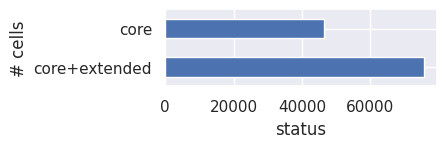

In [29]:
rcParams['figure.figsize'] = 3.5, 1.0
counts_sum = counts.groupby('tech').sum()

ext = pd.DataFrame([counts_sum['n_cells'].sum()], columns=['n_cells'], index=['core+extended'])
counts_sum = pd.concat([counts_sum, ext])
counts_sum = counts_sum.reindex(['core', 'core+extended'])

g = counts_sum.sort_values('n_cells', ascending=False).plot(kind='barh')
g.legend_.remove()
plt.xlabel('status')
plt.ylabel('# cells')

In [30]:
sns.set_style('darkgrid')

Text(0, 0.5, '# individuals')

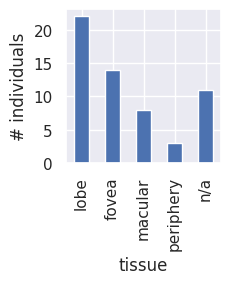

In [31]:
rcParams['figure.figsize'] = 2, 2
donor['tissue'] = donor['tissue'].astype(str)
df2 = donor.drop_duplicates('donor')
df2['tissue'] = np.where(df2['tissue'] == 'nan', 'n/a', df2['tissue'])
df2 = df2['tissue'].value_counts().reset_index()
df2.index = df2['index']
df2 = df2.reindex(list(df2.index[:2]) + list(df2.index[3:]) + list(df2.index[2:3]))

g = df2.plot(kind='bar', x='index')
g.legend_.remove()
plt.xlabel('tissue')
plt.ylabel('# individuals')

Text(0, 0.5, '# individuals')

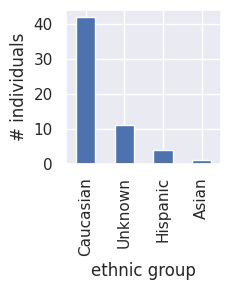

In [32]:
rcParams['figure.figsize'] = 2, 2
donor['ethnicity'] = donor['race'].astype(str)
ethnicity = donor.drop_duplicates('donor')
ethnicity['ethnicity'] = np.where(ethnicity['ethnicity'] == 'nan', 'Unknown', ethnicity['ethnicity'])
ethnicity = ethnicity['ethnicity'].value_counts().reset_index()
g = ethnicity.plot(kind='bar', x='index')
g.legend_.remove()
plt.xlabel('ethnic group')
plt.ylabel('# individuals')

In [33]:
donor[donor['gender'] == 'Male_Female']

,sampleid,donor,tissue,race,gender,age,file,sheet_name,tech,ethnicity
24,Chen_a_10x_Lobe_D017_18_13_NeuN,Chen_mix_D017_13_D018_13,lobe,Caucasian,Male_Female,65_91,/storage/singlecell/jinli/wkfl/atlashumanprj/n...,Chen82,snRNA-seq,Caucasian
25,Chen_a_10x_Lobe_D017_18_13_Nu,Chen_mix_D017_13_D018_13,lobe,Caucasian,Male_Female,65_91,/storage/singlecell/jinli/wkfl/atlashumanprj/n...,Chen82,snRNA-seq,Caucasian
26,Chen_a_10x_Lobe_D018_26_13_NeuN,Chen_mix_D018_13_D026_13,lobe,Caucasian,Male_Female,91_81,/storage/singlecell/jinli/wkfl/atlashumanprj/n...,Chen82,snRNA-seq,Caucasian
27,Chen_a_10x_Lobe_D018_26_13_Nu,Chen_mix_D018_13_D026_13,lobe,Caucasian,Male_Female,91_81,/storage/singlecell/jinli/wkfl/atlashumanprj/n...,Chen82,snRNA-seq,Caucasian


     index  sex
0     Male   39
1   Female   17
2  Unknown    2


Text(0, 0.5, '# individuals')

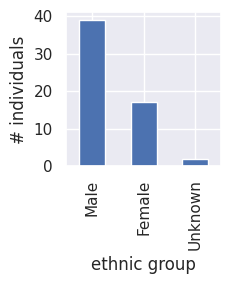

In [34]:
rcParams['figure.figsize'] = 2, 2
donor['sex'] = donor['gender'].astype(str)
df2 = donor.drop_duplicates('donor')
df2['sex'] = np.where(df2['sex'] == 'Male_Female', 'Unknown', df2['sex'])
df2 = df2['sex'].value_counts().reset_index()
print(df2)
g = df2.plot(kind='bar', x='index')
g.legend_.remove()
plt.xlabel('ethnic group')
plt.ylabel('# individuals')

In [35]:
# obs['batch_full'].value_counts()

Text(0, 0.5, '# individuals')

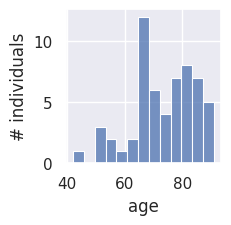

In [37]:
rcParams['figure.figsize'] = 2, 2
donor['ethnicity'] = donor['race'].astype(str)
df2 = donor.drop_duplicates('donor')
df2['ethnicity'] = np.where(df2['ethnicity'] == 'nan', 'Unknown', df2['ethnicity'])
df2 = df2[['age']] # .value_counts()
mapped = df2[['age']]['age'].map({'50-80': 65, '65_91': 78, '91_81': 71})
df2['age'] = np.where(~pd.isnull(mapped), mapped, df2['age']).astype(int)
sns.histplot(data=df2, x='age', bins=13)
# g.legend_.remove()
plt.xlabel('age')
plt.ylabel('# individuals')

Text(0, 0.5, '# individuals')

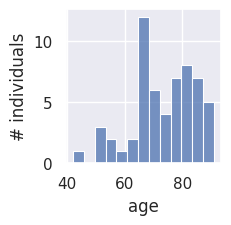

In [39]:
rcParams['figure.figsize'] = 2, 2
donor['ethnicity'] = donor['race'].astype(str)
df2 = donor.drop_duplicates('donor')
df2['ethnicity'] = np.where(df2['ethnicity'] == 'nan', 'Unknown', df2['ethnicity'])
df2 = df2[['age']] # .value_counts()
mapped = df2[['age']]['age'].map({'50-80': 65, '65_91': 78, '91_81': 71})
df2['age'] = np.where(~pd.isnull(mapped), mapped, df2['age']).astype(int)
sns.histplot(data=df2, x='age', bins=13)
# g.legend_.remove()
plt.xlabel('age')
plt.ylabel('# individuals')

In [40]:
df2['age'].describe()

count    58.000000
mean     73.224138
std      11.195305
min      42.000000
25%      65.000000
50%      73.500000
75%      82.000000
max      91.000000
Name: age, dtype: float64

In [41]:
donor_by_filename = donor[['sampleid', 'donor']].set_index('sampleid')['donor'].to_dict()
obs['donor'] = obs['filename'].map(donor_by_filename)

In [42]:
obs['cell_type'] = obs['scpred_prediction']

In [ ]:
len(set(obs['donor'].value_counts()))

In [ ]:
norm = True
for batch_type in ['donor', 'dataset', 'batch_merged']:
    # if batch_type != 'dataset':
    #     continue
    
    # for f in ad_by_f:
    import pandas as pd

    if batch_type == 'batch_merged':
        obs['batch_full'] = obs['dataset'].astype(str) + '_' + obs['batch'].astype(str)
    elif batch_type == 'donor':
        obs['batch_full'] = obs['donor'].astype(str)
    else:
        obs['batch_full'] = obs['dataset'].astype(str)
    
    df = obs[['cell_type', 'batch_full']].value_counts().reset_index()
    df = df.pivot('batch_full', 'cell_type', 0)

    name = df.index
    df = df.reset_index(drop=True)
    df = pd.DataFrame(np.array(df.fillna(0)).astype(int), columns=list(df.columns), index=list(name))

    # df['sum'] = df.sum(axis=1)

    df['sum'] = df.sum(axis=1).values
    # df['k'] = ['_'.join(a) for a in df.index.str.split('_').str[:-1]]
    df['k'] = df.index.str.split('_').str[0]
    rank_by_k = {k : i for i, k in enumerate(df.groupby('k').sum().sort_values('sum').index)}
    df['k_rank'] = df['k'].map(rank_by_k)
    df = df.sort_values(['k_rank', 'sum'], ascending=False)
    del df['k_rank']
    del df['k']
    del df['sum']
    
    if norm:
        df = df.T
        for c in df:
            df[c] = df[c] / sum(df[c])
        df = df.T

    # assert False

    rcParams['figure.figsize'] = [4 if batch_type == 'dataset' else 10, 7]
    rcParams['figure.dpi'] = 120

    from itertools import cycle, islice
    import pandas, numpy as np  # I find np.random.randint to be better
    c = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', 'lightgrey']
    my_colors = list(islice(cycle(c), None, len(df.columns)))

    n_total_cells = df.sum().sum()
    n_batches = len(df.index)
    cells_by_batch = df.sum(axis=1).mean()
    for pi in [0, 1]:
        ax = plt.subplot(2, 1, pi + 1)
        df.plot(kind='bar', stacked=True, width=1.0, linewidth=0.2, logy=pi == 0,
                color=my_colors, edgecolor='black', ax=ax)
        plt.ylabel('# cells%s' % (' (log)' if pi == 0 else ''), fontsize=7)
        plt.xlabel('dataset batch', fontsize=7)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=7)
        if pi == 0:
            plt.title('# cells = %s, # %s = %i\n# cells by batch = %s' % ('{:,}'.format(n_total_cells),
                                                                          batch_type,
                                                                          n_batches,
                                                                          '{:,}'.format(int(cells_by_batch))),
                      fontsize=8)
        plt.legend(fontsize=8, title='scpred', bbox_to_anchor=(1.01, 1))

    plt.tight_layout()

    img_path = '../../data/scIB_run/%s_barplot_scpred.pdf' % (batch_type)
    plt.savefig(img_path)

    print(os.path.abspath(img_path)) # .replace('.pdf', '.png')))
    plt.close()


In [ ]:
print(os.path.abspath(img_path))

In [ ]:
%matplotlib inline

In [ ]:
from PIL import Image

image = Image.open(img_path)
image.show()